In [35]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [36]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
		
df = pd.read_csv("AlCorte.csv")
df.describe()

,Fuerza,Potencia,Temperatura,Tiempo,Resistencia
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,35.000000,75.000000,200.000000,20.000000,38.406667
std,4.548588,13.645765,22.742941,4.548588,8.954403
min,25.000000,45.000000,150.000000,10.000000,22.700000
25%,30.000000,60.000000,175.000000,15.000000,34.675000
50%,35.000000,75.000000,200.000000,20.000000,38.600000
75%,40.000000,90.000000,225.000000,25.000000,42.700000
max,45.000000,105.000000,250.000000,30.000000,58.700000


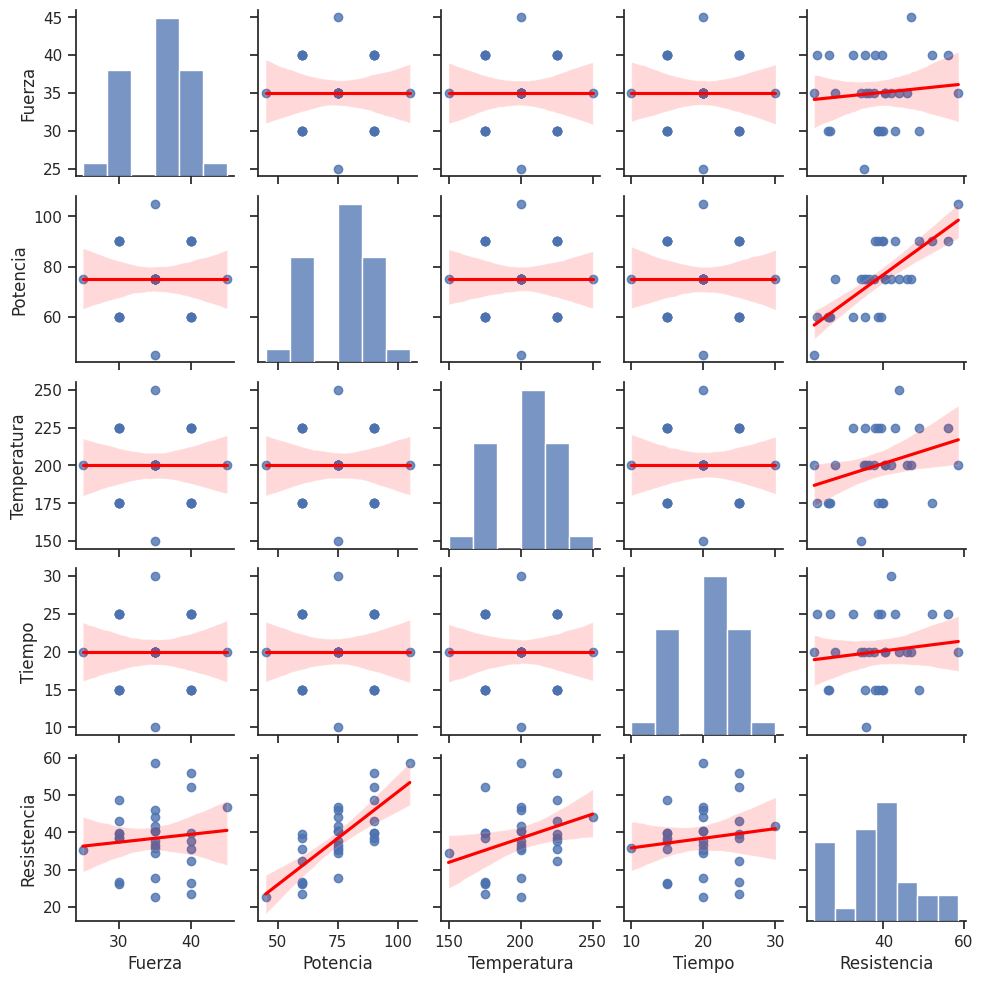

In [37]:
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}}, height=2)
plt.show()

In [38]:
calculate_pvalues(df)

,Fuerza,Potencia,Temperatura,Tiempo,Resistencia
Fuerza,0.0,1.0,1.0,1.0,0.5717
Potencia,1.0,0.0,1.0,1.0,0.0
Temperatura,1.0,1.0,0.0,1.0,0.0755
Tiempo,1.0,1.0,1.0,0.0,0.4894
Resistencia,0.5717,0.0,0.0755,0.4894,0.0


In [39]:
df.corr()["Resistencia"].sort_values(ascending=False)

Resistencia    1.000000
Potencia       0.759419
Temperatura    0.329335
Tiempo         0.131226
Fuerza         0.107521
Name: Resistencia, dtype: float64

In [40]:
model = ols("Resistencia ~ Fuerza + Potencia + Temperatura + Tiempo", df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Resistencia   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     15.60
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           1.59e-06
Time:                        16:22:01   Log-Likelihood:                -89.050
No. Observations:                  30   AIC:                             188.1
Df Residuals:                      25   BIC:                             195.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -37.4767     13.100     -2.861      

In [41]:
print("\nRetrieving manually the parameter estimates:")
print(model._results.params)


Retrieving manually the parameter estimates:
[-37.47666667   0.21166667   0.49833333   0.12966667   0.25833333]


In [42]:
# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

plt.show()


ANOVA results
               df       sum_sq      mean_sq          F        PR(>F)
Fuerza        1.0    26.881667    26.881667   1.010409  3.244356e-01
Potencia      1.0  1341.015000  1341.015000  50.405103  1.928265e-07
Temperatura   1.0   252.201667   252.201667   9.479574  4.991622e-03
Tiempo        1.0    40.041667    40.041667   1.505057  2.313237e-01
Residual     25.0   665.118667    26.604747        NaN           NaN
